# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as mat

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [3]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [4]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [5]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [6]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

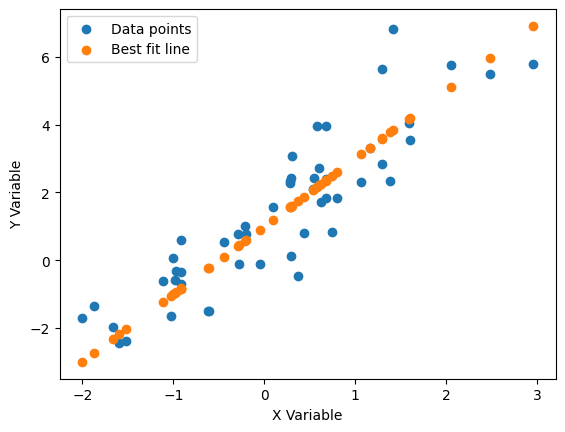

In [7]:
mat.scatter(x = dataset["x"], y = dataset["y"])
mat.scatter(x = dataset["x"], y = dataset["p"])

mat.xlabel("X Variable")
mat.ylabel("Y Variable")
mat.legend(labels = ["Data points", "Best fit line"])
mat.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [11]:
# Write your own code here
subset_above2= dataset.query("y >= 2")
print(len(dataset))
print(len(subset_above2))
print(len(subset_above2)/len(dataset))


50
21
0.42


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [17]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean()
stdv_sample= dataset["y"].std()
dataset.query("abs(y-@ybar)<=@stdv_sample")



,x,e,y,p
3,0.673606,0.044369,2.391581,2.347212
4,1.384251,-1.441745,2.326758,3.768503
6,0.282099,0.784649,2.348846,1.564197
7,0.298924,-1.489276,0.108573,1.597848
8,0.288681,0.857166,2.434527,1.577361
9,0.536677,0.022799,2.096153,2.073354
10,-0.203213,0.166669,0.760244,0.593574
11,1.160502,-0.014635,3.306370,3.321005
13,1.597155,-0.654642,3.539668,4.194311
14,1.296704,-0.768661,2.824747,3.593409


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [18]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [19]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.115016
x            1.838487
dtype: float64


<font size = "5">

Plot the best fit line

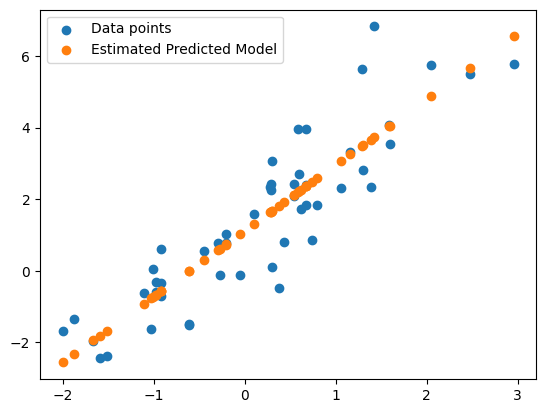

In [20]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

mat.scatter(x = dataset["x"],y = dataset["y"])
mat.scatter(x = dataset["x"],y = dataset["p_estimated"])
mat.legend(labels = ["Data points","Estimated Predicted Model"])
mat.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

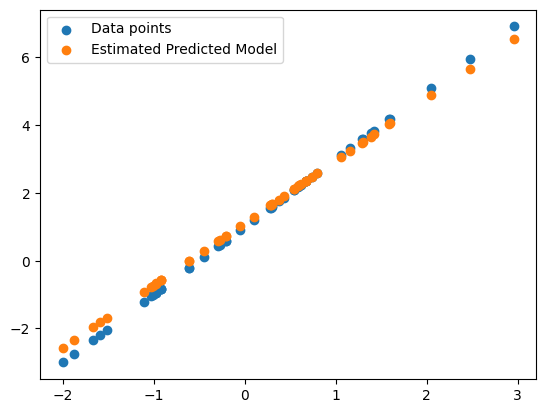

In [21]:
# Write your own code
mat.scatter(x = dataset["x"],y = dataset["p"])
mat.scatter(x = dataset["x"],y = dataset["p_estimated"])
mat.legend(labels = ["Data points","Estimated Predicted Model"])
mat.show()






<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [28]:
# Write your own code
dataset["sample_error"]=dataset["y"]-dataset["p_estimated"]
fn_positive_error=lambda error: error>= 0
dataset["Error"]=dataset["sample_error"].apply(fn_positive_error)



<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [27]:
# Write your own code
dataset["error_sqr"]=dataset["sample_error"]**2

print(dataset["error_sqr"].mean())




1.0593135155811688
